In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [371]:
housing_data = pd.read_csv('train.csv')

In [372]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [373]:
housing_data.shape

(1460, 81)

In [374]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [375]:
housing_data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [376]:
NAColumns = housing_data.isnull().sum() * 100 / len(housing_data)
missing_value_df = pd.DataFrame({'column_name': housing_data.columns,
                                 'percent_missing': NAColumns})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df.head(10)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


In [377]:
# Dropping the columns with more then 45% data unavailable
housing_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

### Have divided the data in Categorical and Numerical sets for further analysis.

In [378]:
# Separating the Numerical and Categorical features.
numeric_df = housing_data.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_data.select_dtypes(include=['object'])

### Checking for Outliers on Numerical Data

In [379]:
outliers_prct = {}

for feature in numeric_df.columns:
    prct_75 = numeric_df[feature].quantile(.75)
    prct_25 = numeric_df[feature].quantile(.25)    
    IQR= prct_75 - prct_25
    upper_lim = prct_75 + 1.5*IQR
    lower_lim = prct_25 - 1.5*IQR
    count=numeric_df[(numeric_df[feature]> upper_lim) | (numeric_df[feature]< lower_lim)].shape[0]
    outliers_prct[feature]=round(count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_prct.keys()),'Percentage':list(outliers_prct.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


In [380]:
for feature,percentage in outliers_prct.items():
    if feature!='SalePrice':
        IQR = housing_data[feature].quantile(.75) - housing_data[feature].quantile(.25) 
        max_value = housing_data[feature].quantile(.75)+1.5*IQR
        min_value = housing_data[feature].quantile(.25)-1.5*IQR
        housing_data[feature][housing_data[feature] > max_value] = max_value
        housing_data[feature][housing_data[feature] < min_value ] = min_value

In [381]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

In [382]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


##### Out of the 38 columns above we can see 8 colums contain only a single value (0.0) and hence can be dropped

In [383]:
housing_data[['BsmtHalfBath','LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFinSF2']].describe()


,BsmtHalfBath,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF2
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
housing_data.drop(['BsmtHalfBath','LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFinSF2'], axis=1, inplace=True)


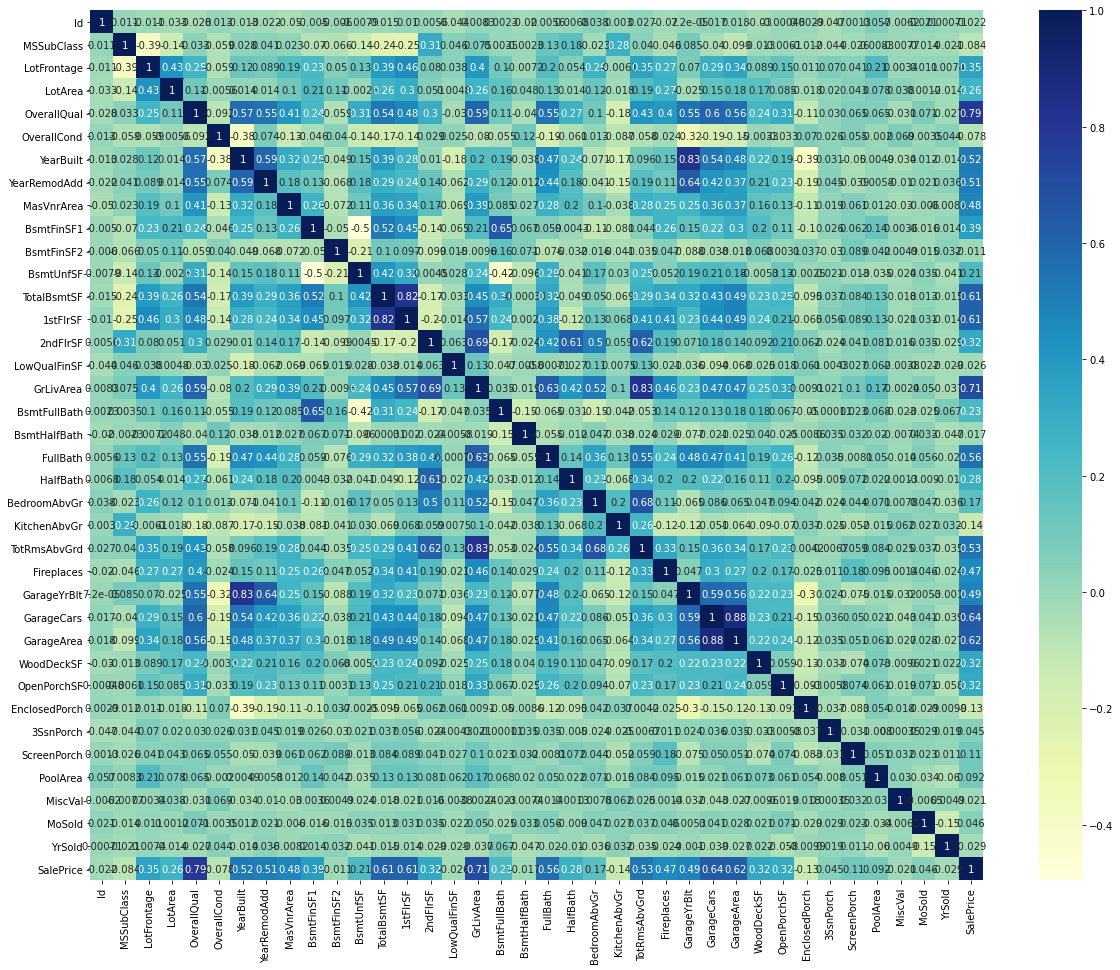

In [385]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),cmap="YlGnBu", annot=True)
plt.show()

#### Observations from above Matrix:
    -OverallQual, GarageArea, TotalRmsAbvGrd, LotFrontage, GrLive are highly correlated with target variable.
    -Some pair of features have very high correlation and hence one of them can be dropped.


#### Univariate and Bi-variate analysis.

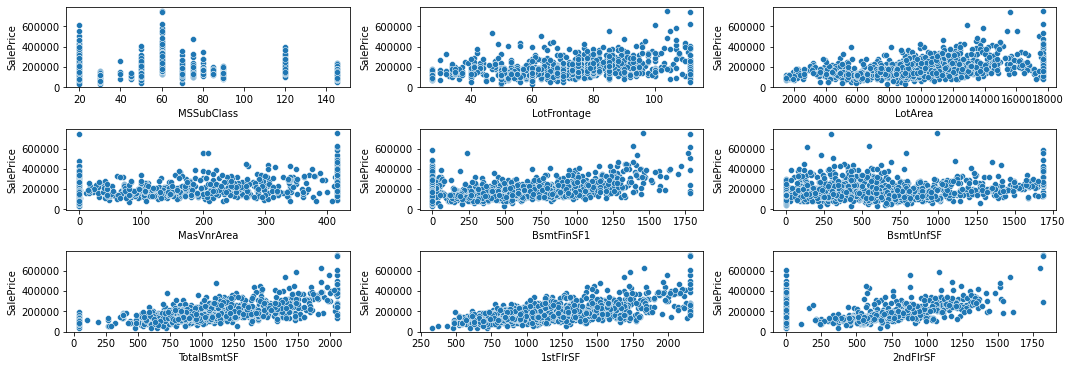

In [386]:
# Starting with 9 numerical columns and columns already dropped in Original Dataset 
# are not used considered for further analysis
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()


#### Observations:
    * MSSubClass has dicrete values.
    * LotStorage, LotArea, TotalBsmtSF, 1stFlrSF show positive correlation with SalePrice

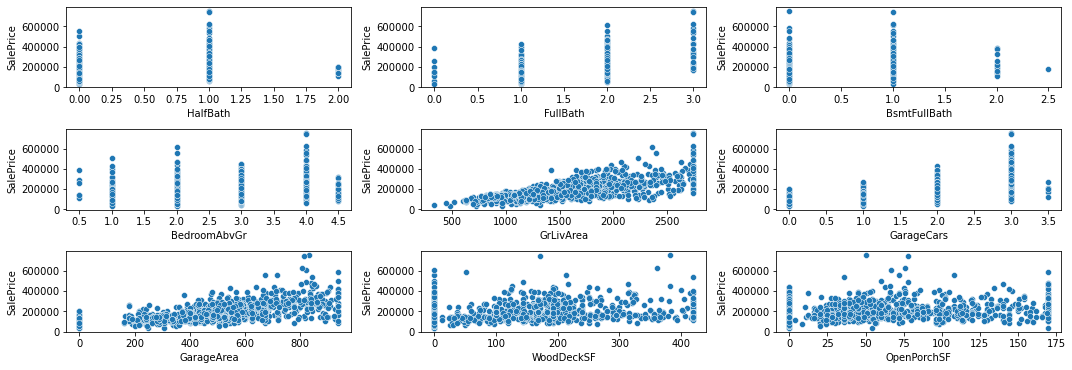

In [387]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['HalfBath', 'FullBath', 'BsmtFullBath', 'BedroomAbvGr', 'GrLivArea',
                             'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()


#### Observations:
    * GarageCars and GarageArea are highly correlated and above graph shows GraphArea is linearly related to target, so we can drop GarageCars
    * HalfBath has only 3 values and its shows only 0.28 correlation with SalePrice hence can be dropped

In [388]:
columns_to_drop_till_now = ['HalfBath', 'GarageCars']

### Numerical Columns with discrete values.

In [389]:
housing_data[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath',
              'FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
              'GarageYrBlt','YearBuilt','YearRemodAdd']]


,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,2,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,2,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,1,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,2,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,2,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,2,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,1,2.0,1,5,0.0,1950.0,1950,1996


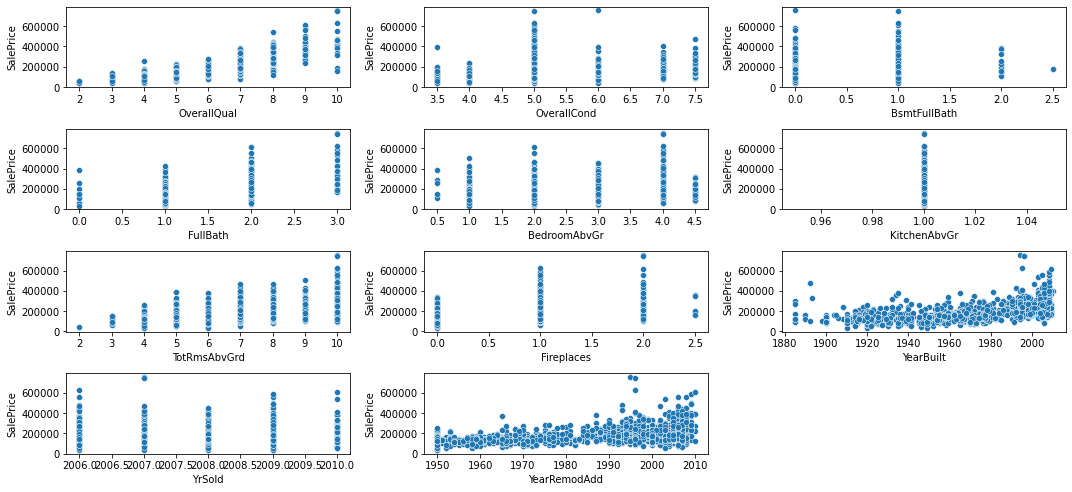

In [390]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['OverallQual','OverallCond','BsmtFullBath',
              'FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                            'YearBuilt','YrSold','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()


#### Observations:
    * YearRemodAdd and YearBuilt show positive correlation
    * KitchenAbvGr has only one value, can be dropped.
    * OverallQual had positive correlation, OverallCond with value 5 has highest Sale Price
    * YrSold doesn't have any relation to Sale Price.
    * TotRmsAbvGrd has positive correlation with Sale Price.
    * for all Year colums will have to extract new features so they are more meaningful.

In [391]:
columns_to_drop_till_now.append('KitchenAbvGr')

In [392]:
# Converting the year value features into relative years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_data[feature] = 2022 - housing_data[feature]


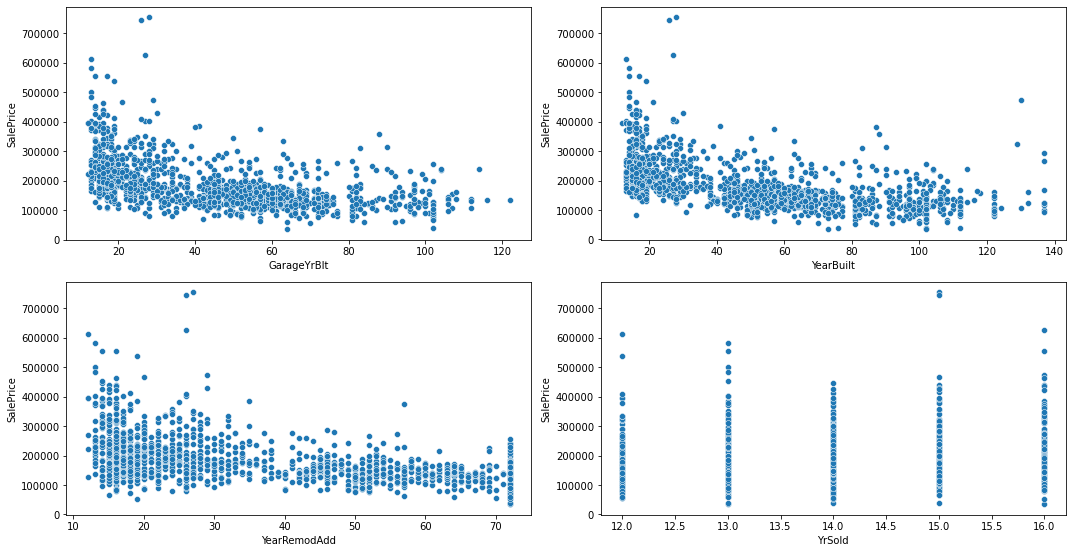

In [393]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'])
    plt.tight_layout()

#### Observations:
    * GarageYrBlt, YearBuilt and YearModelAdd show inverse relationship.
    * YrSold doesn't show any relationship with Sale Price hence can be dropped.

In [394]:
columns_to_drop_till_now.append('YrSold')

#### Handle Missing Values.

In [395]:
for feat in housing_data.select_dtypes(exclude=['object']).columns:
    if housing_data[feat].isnull().any():
        print(feat, ' : ',  round(housing_data[feat].isnull().sum()/housing_data.shape[0], 2)*100)

LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [396]:
# MasVrnArea has only 1% data missingTotalBsmtSF, hence dropping those rows
housing_data = housing_data[~housing_data['MasVnrArea'].isnull()]

In [397]:
# Adding the columns to drop that we fetched from HeapMap as highly correlated.
columns_to_drop_till_now.append('GarageYrBlt') # Dropping GarageYrBlt as (GarageYrBlt|YearBuilt) = 0.83
columns_to_drop_till_now.append('GrLivArea') # Dropping GrLivArea as (TotRmsAbvGrd|GrLivArea) = 0.83
columns_to_drop_till_now.append('TotalBsmtSF') # Dropping TotalBsmtSF as (TotalBsmtSF|1stFlrSF) = 0.82


In [398]:
columns_to_drop_till_now

['HalfBath',
 'GarageCars',
 'KitchenAbvGr',
 'YrSold',
 'GarageYrBlt',
 'GrLivArea',
 'TotalBsmtSF']

In [399]:
housing_data.drop(columns_to_drop_till_now, axis=1, inplace=True)

In [400]:
housing_data.columns.shape

(61,)

### Analyzing Categorical fields.

In [401]:
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [402]:
for feature in categorical_df.columns:
    if housing_data[feature].isnull().any():
        print(feature, ':', round(housing_data[feature].isnull().sum()/housing_data.shape[0], 2)*100)


BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0


##### Checking for default values in DataDictionary
    -BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
    -For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

In [403]:
imp_val_ctry = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
print(housing_data[imp_val_ctry].isnull().sum())

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [404]:
# Imputing missing values with Not_Applicable
housing_data[imp_val_ctry] = housing_data[imp_val_ctry].fillna(value='Not_Applicable', axis=1)
print(housing_data[imp_val_ctry].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


Ordered Features - 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

Unordered Features - 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition'

In [405]:
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(15, 15))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_data['SalePrice'], housing_data[feature])
        plt.tight_layout()


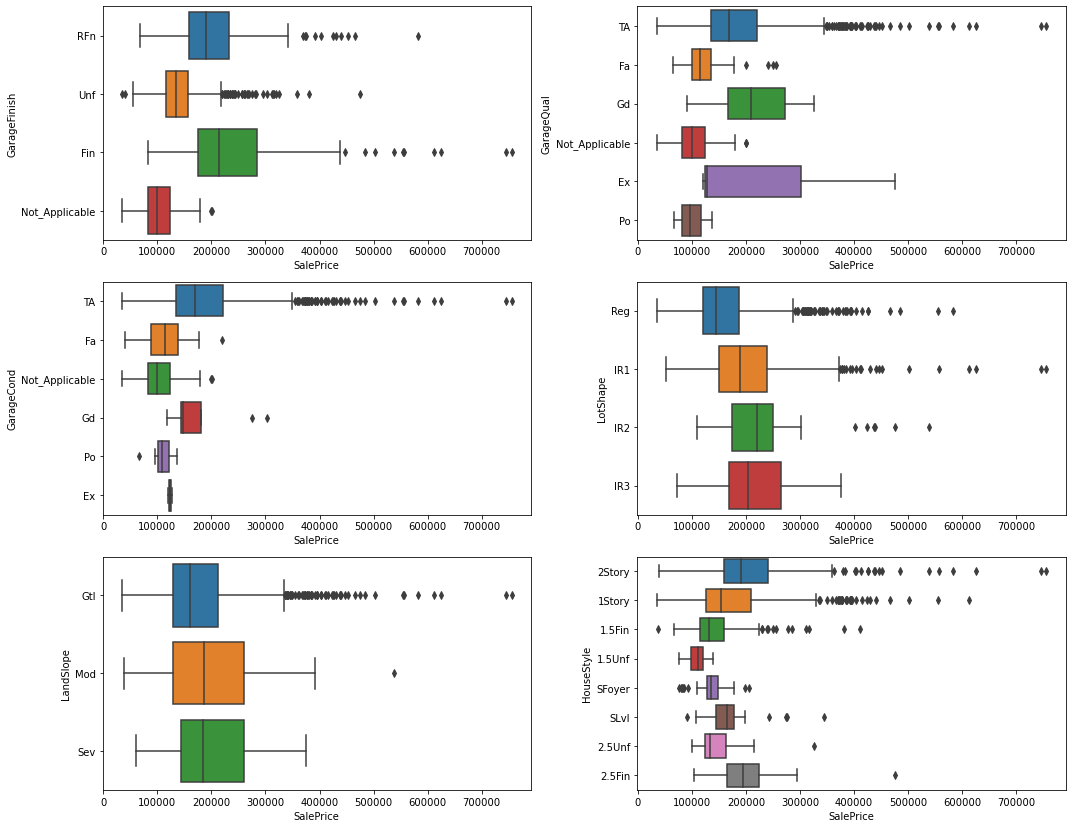

In [406]:
generate_boxplot(['GarageFinish', 'GarageQual', 'GarageCond','LotShape','LandSlope', 'HouseStyle'])

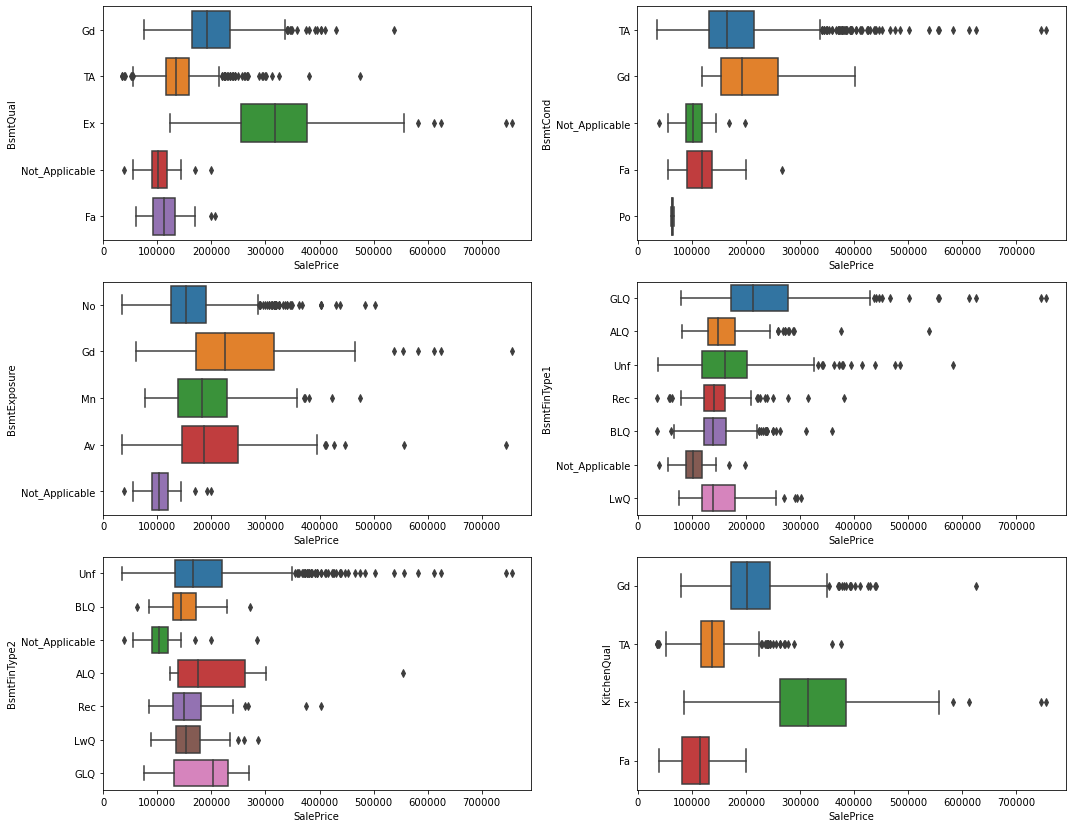

In [407]:
generate_boxplot(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual'])

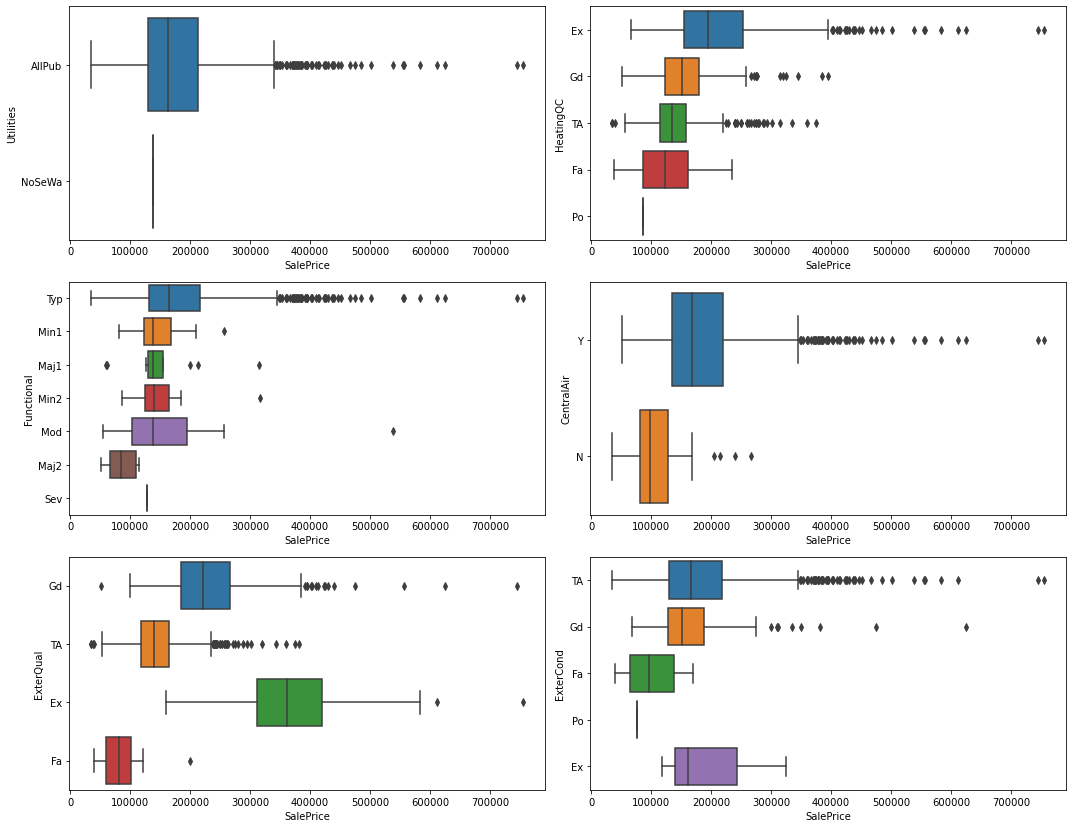

In [408]:
generate_boxplot(['Utilities','HeatingQC','Functional','CentralAir','ExterQual', 'ExterCond'])

1. Houses with Good Exterior Quality, Good Exterior Condition, HouseStyle as 2 (Double Story), Furnished Garage have high price.
2. Houses with excellent heating quality and kitchen quality have the better SalePrice.
3. Houses with excellect quality basement and good living quarters have good price.
4. Most of the houses have all public utilities.
5. Irregular lotshapes have better prices.

In [409]:
housing_data['LotShape'] = housing_data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['Utilities'] = housing_data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_data['LandSlope'] = housing_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_data['HouseStyle'] = housing_data['HouseStyle'].map({'1Story':0,'1.5Unf':1,'1.5Fin':2,'2Story':3,'2.5Unf':4,'2.5Fin':5,'SFoyer':6,'SLvl':7})
housing_data['ExterQual'] = housing_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['ExterCond'] = housing_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data['BsmtCond'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map({'Not_Applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map({'Not_Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].map({'Not_Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['CentralAir'] = housing_data['CentralAir'].map({'N':0,'Y':1})
housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data['GarageFinish'].map({'Not_Applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['GarageQual'] = housing_data['GarageQual'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data['GarageCond'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['Functional'] = housing_data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})

### Analyzing Categorical fields.

In [410]:
unorder_ctry_features = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 
                         'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                         'MasVnrType', 'Foundation', 'Heating','Electrical', 'GarageType','PavedDrive',
                         'SaleType','SaleCondition']

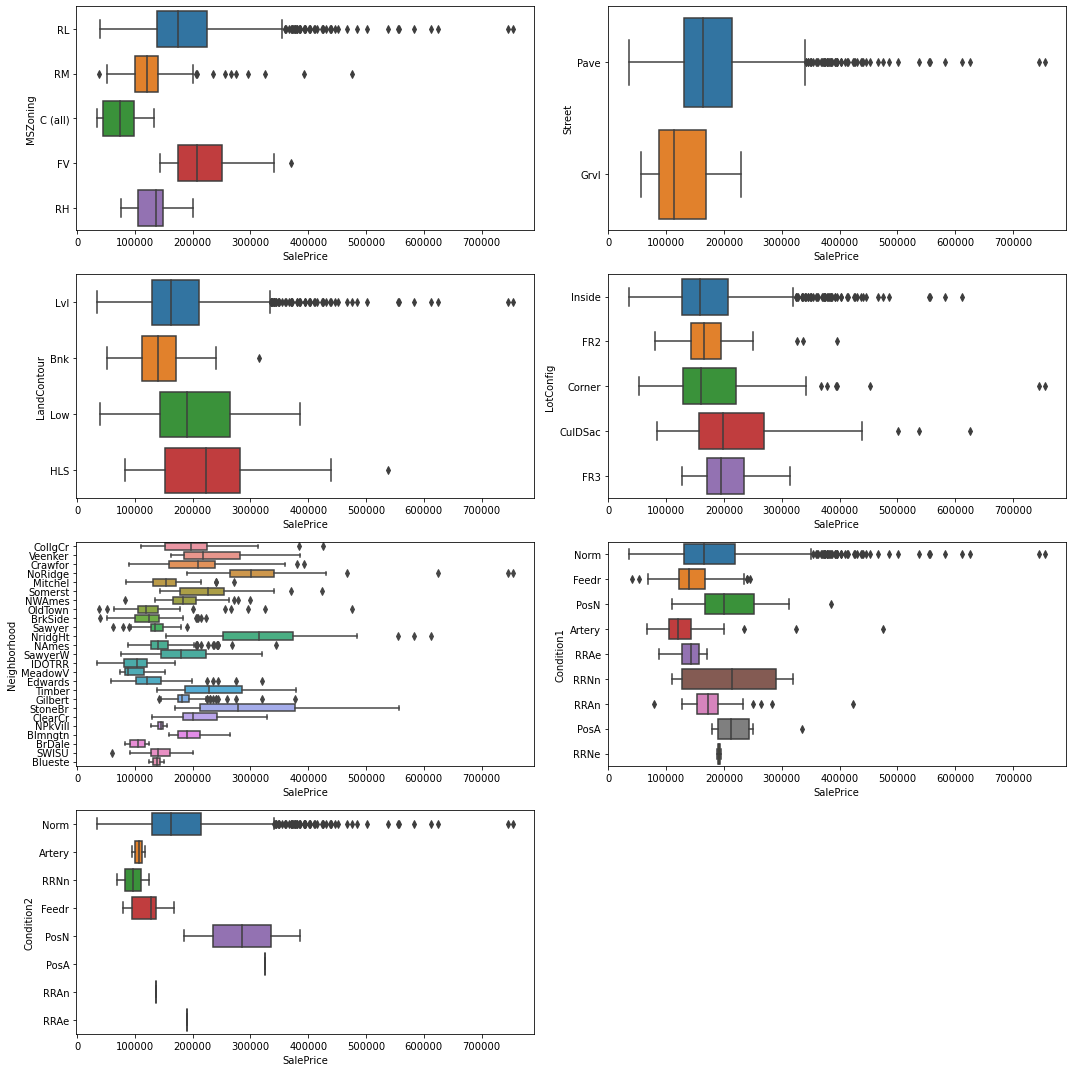

In [411]:
generate_boxplot(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
                  'Condition1' , 'Condition2'])

1. MSZoning as RL has the highest Sale prices.
2. Neighbourhood has lot of categories and they don't show any pattern with Sale price.
3. Codition as Normal have better Sale prices.

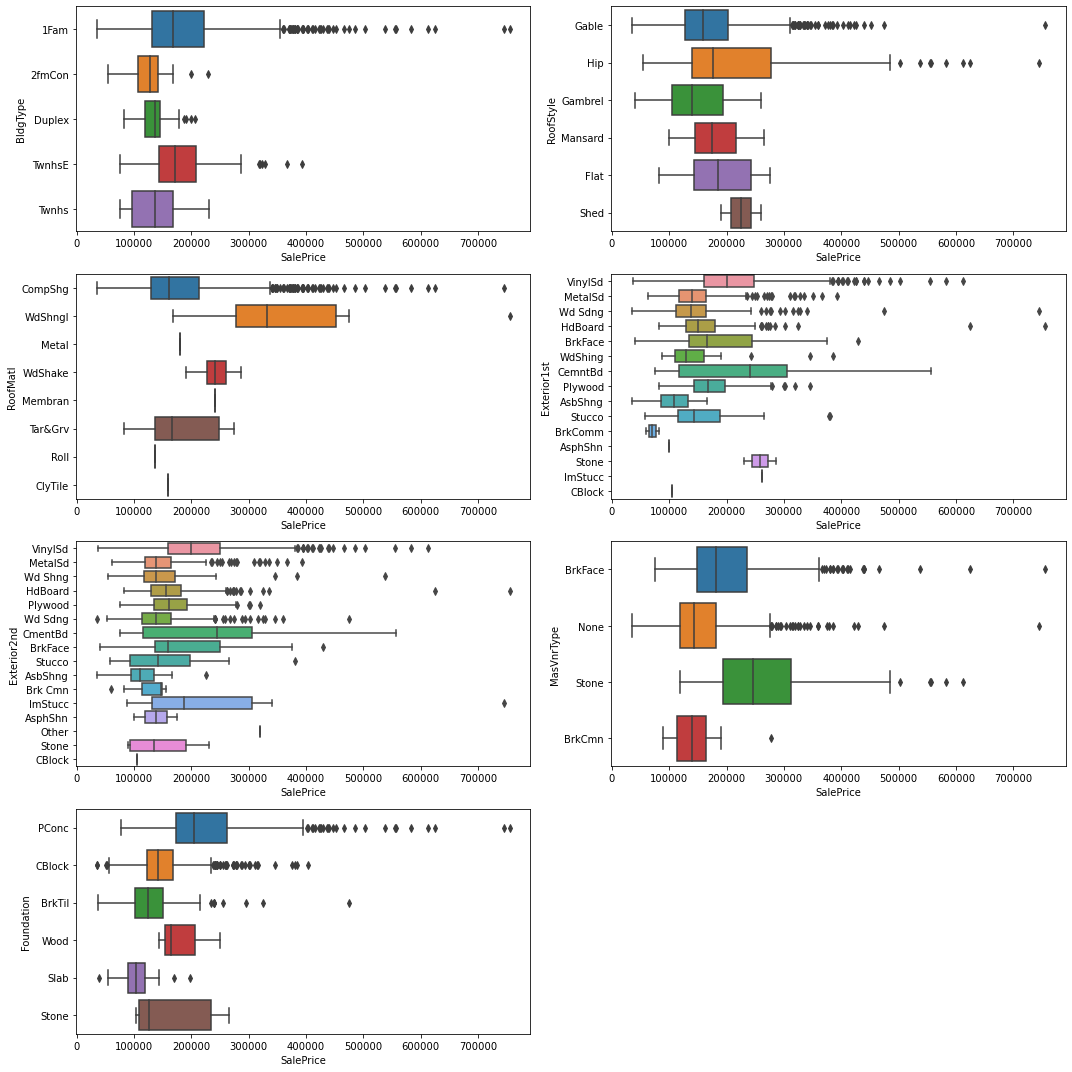

In [412]:
generate_boxplot(['BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                         'MasVnrType', 'Foundation'])

1. RoofMatl, Exterior1st, Exterior2nd have lot of categories with some values present very less.
2. RoofStyle as Gable and Hip have higher Sale Prices.

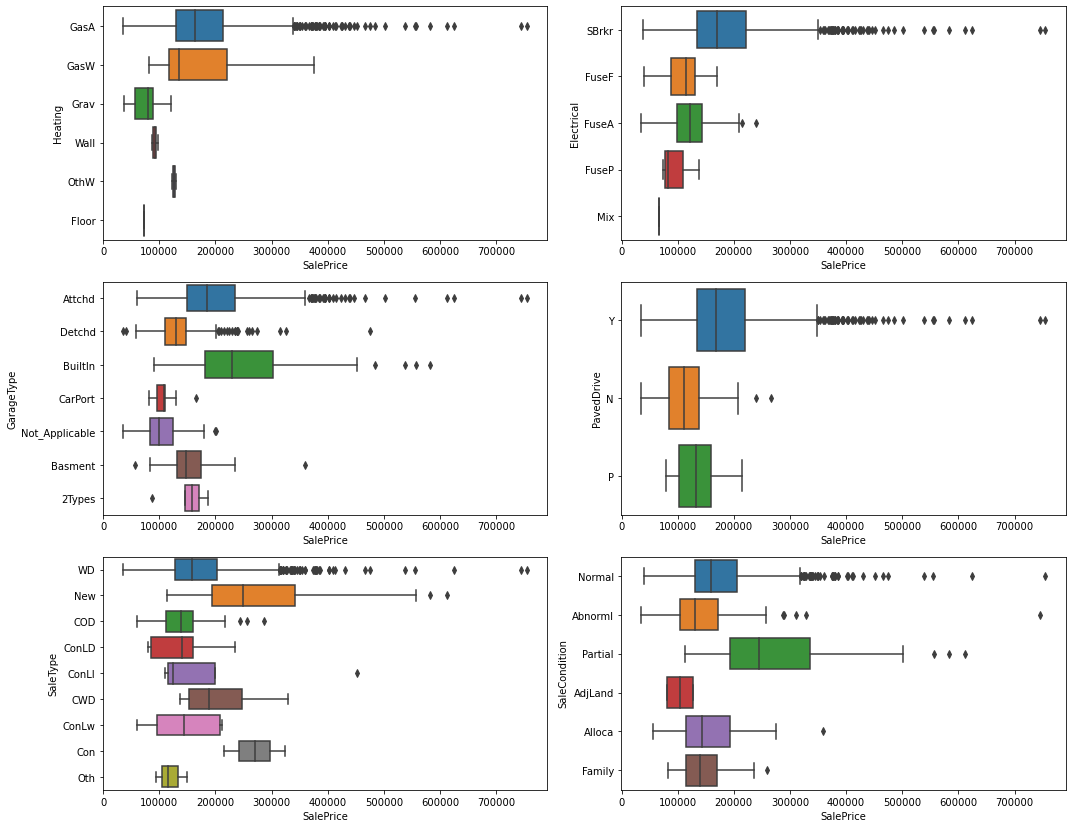

In [413]:
generate_boxplot(['Heating','Electrical', 'GarageType','PavedDrive',
                         'SaleType','SaleCondition'])

In [414]:
dummy_df = pd.get_dummies(housing_data[unorder_ctry_features], drop_first=True)

In [415]:
dummy_df.shape

(1452, 134)

** Most of the features above have one category dominating hence there is no point in adding all 134 new columns to data set, If we find any column represented by a value for more then 85% rows, need to remove those features.

In [416]:
dummies_columns_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.85:
        dummies_columns_to_drop.append(feat)
        
print(dummies_columns_to_drop)
print(len(dummies_columns_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofSt

In [417]:
dummy_df = dummy_df.drop(dummies_columns_to_drop, axis=1)
print(dummy_df.shape)

(1452, 26)


In [418]:
housing_data.shape

(1452, 61)

In [419]:
housing_data = pd.concat([housing_data,dummy_df],axis=1)
housing_data = housing_data.drop(unorder_ctry_features,axis=1)

In [420]:
housing_data.shape

(1452, 67)

### Split the data into training and test set

In [421]:
X = housing_data.drop('SalePrice', axis=1)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,...,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_Inside,Neighborhood_NAmes,Condition1_Norm,Condition2_Norm,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_None,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,PavedDrive_Y,SaleType_WD,SaleCondition_Normal
0,1,60,65.0,8450.0,3,3,0,3,7,5.0,19,19,196.0,3,2,4,3,1,6,706.0,1,150.0,4,1,856.0,...,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1
1,2,20,80.0,9600.0,3,3,0,0,6,7.5,46,46,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1,1262.0,...,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,1
2,3,60,68.0,11250.0,0,3,0,3,7,5.0,21,20,162.0,3,2,4,3,2,6,486.0,1,434.0,4,1,920.0,...,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1
3,4,70,60.0,9550.0,0,3,0,3,7,5.0,107,52,0.0,2,2,3,4,1,5,216.0,1,540.0,3,1,961.0,...,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0
4,5,60,84.0,14260.0,0,3,0,3,8,5.0,22,22,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1,1145.0,...,0,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1


In [422]:
X.drop('Id', axis=1).head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,...,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_Inside,Neighborhood_NAmes,Condition1_Norm,Condition2_Norm,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_None,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,PavedDrive_Y,SaleType_WD,SaleCondition_Normal
0,60,65.0,8450.0,3,3,0,3,7,5.0,19,19,196.0,3,2,4,3,1,6,706.0,1,150.0,4,1,856.0,854,...,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1
1,20,80.0,9600.0,3,3,0,0,6,7.5,46,46,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1,1262.0,0,...,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,1
2,60,68.0,11250.0,0,3,0,3,7,5.0,21,20,162.0,3,2,4,3,2,6,486.0,1,434.0,4,1,920.0,866,...,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1
3,70,60.0,9550.0,0,3,0,3,7,5.0,107,52,0.0,2,2,3,4,1,5,216.0,1,540.0,3,1,961.0,756,...,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,22,22,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1,1145.0,1053,...,0,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1


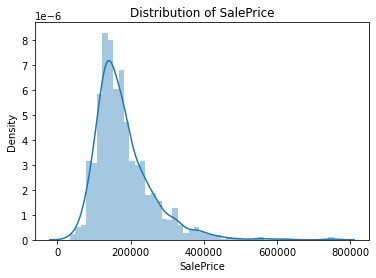

In [423]:
plt.title('Distribution of SalePrice')
sns.distplot(housing_data['SalePrice'])
plt.show()

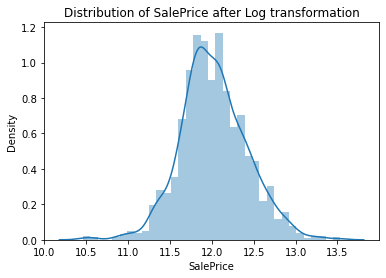

In [424]:
plt.title('Distribution of SalePrice after Log transformation')
sns.distplot(np.log(housing_data['SalePrice']))
plt.show()

In [425]:
y = np.log(housing_data['SalePrice'])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [427]:
# The LotFrontage was left for imputing post train test split, filling the NAN values with Median
si_obj = SimpleImputer(missing_values=np.nan, strategy='mean')
si_obj.fit(X_train[['LotFrontage']])


SimpleImputer()

In [428]:
X_train[['LotFrontage']] = si_obj.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si_obj.transform(X_test[['LotFrontage']])

In [429]:
X_test[['LotFrontage']].value_counts()

LotFrontage
69.733572      78
60.000000      50
70.000000      21
80.000000      19
50.000000      18
               ..
71.000000       1
104.000000      1
96.000000       1
105.000000      1
97.000000       1
Length: 74, dtype: int64

### Feature Scaling

In [430]:
strd_scaler_obj = StandardScaler()
strd_scaler_obj.fit(X_train)

StandardScaler()

In [431]:
X_train_scaled = pd.DataFrame(data=strd_scaler_obj.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=strd_scaler_obj.transform(X_test), columns=X_test.columns)

In [432]:
X_train_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,...,MSZoning_RM,Street_Pave,LandContour_Lvl,LotConfig_Inside,Neighborhood_NAmes,Condition1_Norm,Condition2_Norm,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_None,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,PavedDrive_Y,SaleType_WD,SaleCondition_Normal
0,-1.446552,-0.248255,-8.217105e-01,-1.468949,-1.384126,0.031388,-0.214775,-0.348216,-0.809910,1.524391,1.403002,1.675958,-0.674346,-0.694478,2.551904,-0.557069,0.102260,-0.588452,-0.745547,-0.739906,-0.28946,0.006506,0.888536,0.243797,-0.854214,...,2.421748,0.070325,-3.026549,0.627447,-0.438735,-2.402776,0.099701,0.527245,-0.496614,0.126491,-0.419435,-0.429126,-0.756806,-0.743987,-0.674972,0.829281,-0.882799,-0.897005,0.138048,0.315543,-1.215750,-0.586443,-3.374944,0.391452,0.46088
1,-0.038451,2.484432,-5.428540e-01,0.073556,0.749822,0.031388,-0.214775,-0.854350,-1.543305,-0.584229,0.054581,0.710557,0.491421,-0.694478,-0.235982,-0.557069,0.102260,1.294594,0.680066,0.803756,-0.28946,-0.925371,-1.210889,-4.101775,-0.521724,...,-0.412925,0.070325,0.330409,0.627447,-0.438735,-2.402776,0.099701,0.527245,-0.496614,0.126491,2.384158,-0.429126,-0.756806,-0.743987,1.481543,-1.205863,1.132760,-0.897005,-7.243872,0.315543,-1.215750,1.705196,0.296301,0.391452,0.46088
2,-1.122160,0.708185,1.018742e+00,-0.320718,-1.384126,0.031388,-0.214775,2.688587,-0.076516,1.524391,-0.181393,-0.496193,-0.339188,-0.694478,-0.235982,0.593301,1.925008,1.294594,0.680066,0.154638,-0.28946,-1.339270,-1.210889,0.243797,0.176505,...,-0.412925,0.070325,0.330409,-1.593760,-0.438735,0.416185,0.099701,0.527245,-0.496614,0.126491,2.384158,-0.429126,-0.756806,-0.743987,1.481543,-1.205863,1.132760,-0.897005,0.138048,0.315543,0.822537,-0.586443,0.296301,0.391452,0.46088
3,1.244699,0.708185,7.925579e-16,0.763957,-1.384126,0.031388,-0.214775,2.688587,-0.076516,-0.584229,-0.147683,0.420937,1.766479,-0.694478,-0.235982,-0.557069,0.102260,1.294594,1.155270,0.230330,-0.28946,-0.194392,-1.210889,0.243797,-0.316688,...,-0.412925,0.070325,0.330409,0.627447,-0.438735,0.416185,0.099701,0.527245,-0.496614,0.126491,2.384158,-0.429126,-0.756806,-0.743987,1.481543,-1.205863,1.132760,-0.897005,0.138048,0.315543,0.822537,-0.586443,0.296301,0.391452,0.46088
4,0.922710,-0.931426,-2.082262e-01,-0.193606,0.749822,0.031388,-0.214775,-0.854350,-0.809910,1.524391,0.627660,-1.027163,-0.674346,-0.694478,-0.235982,-0.557069,0.102260,-0.588452,0.204862,0.468875,-0.28946,-0.455802,-0.161176,0.243797,-0.388728,...,-0.412925,0.070325,0.330409,0.627447,2.279281,0.416185,0.099701,0.527245,-0.496614,0.126491,-0.419435,-0.429126,-0.756806,-0.743987,-0.674972,0.829281,1.132760,-0.897005,0.138048,0.315543,0.822537,-0.586443,0.296301,0.391452,0.46088


In [433]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

def top_n_features(n):
    num_cols = []
    
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    rfe = RFE(lr_model, n)
    rfe = rfe.fit(X_train_scaled, y_train)
    
    rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            num_cols.append(i[0])
    print(num_cols)
    return num_cols

In [434]:
top_45 = top_n_features(45)

['LotArea', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'MSZoning_RM', 'Street_Pave', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'Foundation_CBlock', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Normal']


In [435]:
# To estimate the optimal numbers of features for final model, running LinearRegression model from StatsModel library.
# then based on Adjusted R2 value will arrive on a set of features.
import statsmodels.api as sm
def build_rm_statsmodel(X,y,columns):
    X_const = sm.add_constant(X[columns])
    lr_model = sm.OLS(y.values.reshape(-1,1), X_const).fit()
    print(lr_model.summary())    

In [436]:
top_45_features = build_rm_statsmodel(X_train_scaled, y_train,top_n_features(45))

['LotArea', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'MSZoning_RM', 'Street_Pave', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'Foundation_CBlock', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Normal']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least 

In [437]:
top_50_features = build_rm_statsmodel(X_train_scaled, y_train,top_n_features(50))

['MSSubClass', 'LotArea', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'MSZoning_RM', 'Street_Pave', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'Foundation_CBlock', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Normal']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj.

In [438]:
top_55_features = build_rm_statsmodel(X_train_scaled, y_train,top_n_features(55))

['MSSubClass', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'Foundation_CBlock', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Normal']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:   

In [439]:
X_train_RFE = X_train_scaled[top_45]
X_test_RFE = X_test_scaled[top_45]

In [440]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
    if(model=='ridge'):
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator=estimator_model, param_grid=params,
                                   scoring='neg_mean_absolute_error',
                                   cv=5,
                                   return_train_score=True,
                                   verbose=1)
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Best alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_
    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    print(model," Regression with ",alpha)
    print("######################################")
    print("R2 Score for Train : ", r2_score(y_train, y_train_pred))
    print("R2 Score for Test : ", r2_score(y_test, y_test_pred))
    print("RMSE for Train : ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("RMSE for Test : ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred

    

In [441]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

final_ridge_model, y_test_predicted = build_model(X_train_RFE, y_train, X_test_RFE, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best alpha for ridge is 20.000000
ridge  Regression with  20
######################################
R2 Score for Train :  0.9069603883777637
R2 Score for Test :  0.8768546256755142
RMSE for Train :  0.12045961291211522
RMSE for Test :  0.14354572102869353


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.6s finished


In [442]:
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]}

final_lasso_model, y_test_predicted = build_model(X_train_RFE, y_train, X_test_RFE, params, model='lasso')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best alpha for lasso is 0.001000
lasso  Regression with  0.001
######################################
R2 Score for Train :  0.9067700196101982
R2 Score for Test :  0.8795525366038728
RMSE for Train :  0.12058278641557757
RMSE for Test :  0.1419645887272507


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


In [443]:
model_coef = pd.DataFrame(index=X_test_RFE.columns)
model_coef.rows = X_test_RFE.columns

model_coef['Ridge (20.0)'] = final_ridge_model.coef_
model_coef['Lasso (0.001)'] = final_lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coef

,Ridge (20.0),Lasso (0.001)
LotArea,0.038459,0.037754
LandSlope,0.010448,0.009231
HouseStyle,-0.007511,-0.007328
OverallQual,0.076263,0.079020
OverallCond,0.048454,0.048856
YearBuilt,-0.042104,-0.044849
YearRemodAdd,-0.019366,-0.018355
MasVnrArea,0.008359,0.002519
BsmtQual,0.016182,0.017236
BsmtExposure,0.014946,0.014130


## Final Model

In [444]:
model_coef[['Lasso (0.001)']].sort_values(by='Lasso (0.001)', ascending=False)


,Lasso (0.001)
1stFlrSF,0.100857
2ndFlrSF,0.093783
OverallQual,0.079020
OverallCond,0.048856
LotArea,0.037754
GarageArea,0.037571
BsmtFinSF1,0.035346
Fireplaces,0.033663
Condition1_Norm,0.023915
Foundation_PConc,0.018585


In [445]:
model_coef[['Lasso (0.001)']].sort_values(by='Lasso (0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea',
       'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'Condition1_Norm',
       'Foundation_PConc'],
      dtype='object')

#### Running to answer Subjective Questions.

In [447]:
# Doubling the value of alpha for Lasso Regression
params = {'alpha': [0.002]}

final_lasso_model_sub, y_test_predicted = build_model(X_train_RFE, y_train, X_test_RFE, params, model='lasso')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best alpha for lasso is 0.002000
lasso  Regression with  0.002
######################################
R2 Score for Train :  0.9058523234112869
R2 Score for Test :  0.8803732140929509
RMSE for Train :  0.1211748029740925
RMSE for Test :  0.14148011908639785


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [449]:
model_coef_sub = pd.DataFrame(index=X_test_RFE.columns)
model_coef_sub.rows = X_test_RFE.columns

model_coef_sub['Lasso (0.002)'] = final_lasso_model_sub.coef_
pd.set_option('display.max_rows', None)
model_coef_sub

,Lasso (0.002)
LotArea,0.037389
LandSlope,0.007770
HouseStyle,-0.006454
OverallQual,0.080863
OverallCond,0.046911
YearBuilt,-0.041591
YearRemodAdd,-0.018736
MasVnrArea,0.000025
BsmtQual,0.019776
BsmtExposure,0.012965
